# Regresión

Vamos a retomar el trabajó del dataset de paltas (*avocados*). Su descripción la pueden encontrar en https://www.kaggle.com/neuromusic/avocado-prices.

### 1. Carga de datos

a. Abrir el dataset (avocado.csv). Parsear fechas con la columna "Date".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
palta = pd.read_csv('avocado.csv', delimiter=',', parse_dates=["Date"])
palta.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


b. Eliminar la columna "Unnamed: 0".

In [3]:
palta.drop('Unnamed: 0', axis = 1, inplace = True)
palta.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


c. Ordenar el dataframe de manera creciente por fecha.

In [4]:
palta.sort_values("Date", inplace = True)
palta.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


d. Resetear los índices del Dataframe

In [5]:
palta.reset_index(inplace = True, drop  = True)
palta.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
3,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
4,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


### 2. Análisis exploratorio de datos

a. ¿Cuáles variables son numéricas y cuáles categóricas?¿Hay NaNs?

In [6]:
palta.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

b. Seleccionar solamente las instancias correspondientes a la region "Chicago".

In [7]:
palta_chicago = palta[palta.region == 'Chicago']
palta_chicago.reset_index(inplace = True, drop = True)
palta_chicago.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
1,2015-01-04,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago
2,2015-01-11,1.79,12915.74,1426.75,10900.10,0.00,588.89,588.89,0.00,0.00,organic,2015,Chicago
3,2015-01-11,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago
4,2015-01-18,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago


c. ¿Cómo son los precios de las paltas en función de las distintas variables?

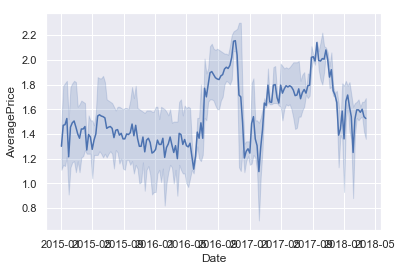

In [8]:
sns.lineplot(x = 'Date', y = 'AveragePrice', data = palta_chicago)
# sns.lineplot(x = 'Date', y = 'AveragePrice', data = palta_chicago, hue = 'type')

Mejoremos el gráfico 

C:\Users\vdbar\Anaconda3\envs\Deforestacion\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\vdbar\Anaconda3\envs\Deforestacion\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


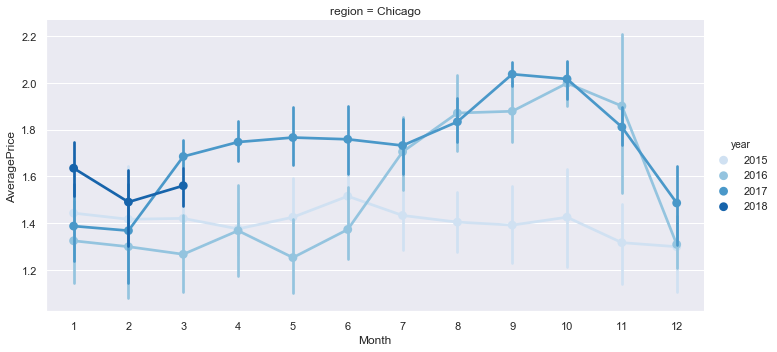

In [9]:
palta_chicago['Month'] = palta_chicago['Date'].dt.month
g = sns.factorplot('Month','AveragePrice',data=palta_chicago,
               hue='year',
               row='region',
               aspect=2,
               palette='Blues',
              )


**Cálcular la matriz de correlación**

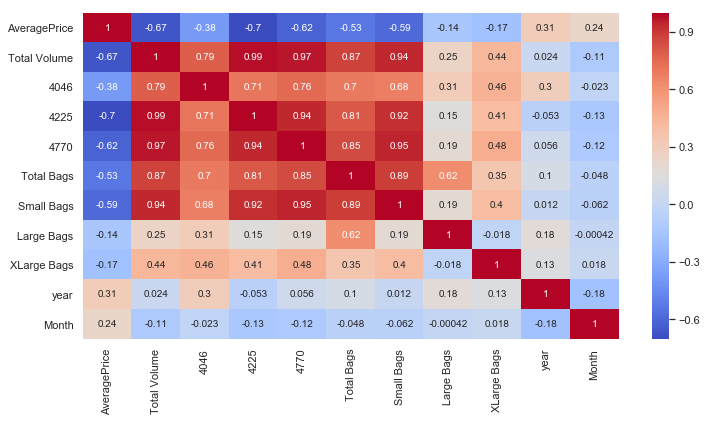

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(palta_chicago.corr(),cmap='coolwarm',annot=True)

#### Pasar fechas a números

A veces, en lugar de trabajar con fechas, es más fácil pasarlas a un número representativo. La siguiente celda se encarga de eso.

In [11]:
import datetime as dt
palta_chicago['Date']=palta_chicago['Date'].map(dt.datetime.toordinal)
palta_chicago.head()

C:\Users\vdbar\Anaconda3\envs\Deforestacion\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,735602,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago,1
1,735602,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago,1
2,735609,1.79,12915.74,1426.75,10900.10,0.00,588.89,588.89,0.00,0.00,organic,2015,Chicago,1
3,735609,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago,1
4,735616,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago,1


#### **KNN con más variables**: Date y Type

Primero debemos convertir el type a una variable numérica: ¿Por qué?

In [12]:
palta_chicago.type = palta_chicago.type.map({'conventional': 0, 'organic': 1})
palta_chicago.head()

C:\Users\vdbar\Anaconda3\envs\Deforestacion\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,735602,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,1,2015,Chicago,1
1,735602,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,0,2015,Chicago,1
2,735609,1.79,12915.74,1426.75,10900.10,0.00,588.89,588.89,0.00,0.00,1,2015,Chicago,1
3,735609,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,0,2015,Chicago,1
4,735616,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,0,2015,Chicago,1


In [13]:
X = palta_chicago[['Date','type']].values
y = palta_chicago.AveragePrice.values
print(X.shape, y.shape)

(338, 2) (338,)


#### Train-Test Split

Ahora necesita dividir nuestra variable en conjuntos de entrenamiento y prueba. Realizará esto importando `train_test_split` de la biblioteca` sklearn.model_selection`. Por lo general, es una buena práctica mantener el 70% de los datos en el conjunto de datos del tren y el 30% restante en el conjunto de datos de prueba.

Llamemos desarrollo y held out a train y test, respectivamente

In [14]:
from sklearn.model_selection import train_test_split
X_dev, X_ho, y_dev, y_ho = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_dev.shape)
print(y_dev.shape)
print(X_ho.shape)
print(y_ho.shape)

(236, 2)
(236,)
(102, 2)
(102,)


Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en desarrollo como en held out.

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_dev` y `rmses_ho` para ir guardando los **rmse** de cada profundidad

NOTA: La raíz del error cuadrático medio o raíz de la desviación cuadrática media es una medida de uso frecuente de las diferencias entre los valores predichos por un modelo o un estimador y los valores observados.

**Ejemplo para cálcular RMSE:**

from sklearn.metrics import mean_squared_error

MSE= mean_squared_error(y_dev, y_pred)

RMSE= np.sqrt(tree_mse_traing)

In [16]:
# Calculá los cambio en el rmse en esta celda
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
rmses_dev= []
rmses_ho= []

for n_nborns in range(1,30, 1):
    knn= KNeighborsRegressor(n_neighbors=n_nborns)
    knn.fit(X_dev, y_dev)
    
    y_pred= knn.predict(X_dev)
    tree_mse_traing = mean_squared_error(y_dev, y_pred)
    rmse= np.sqrt(tree_mse_traing)
    rmses_dev.append(rmse)
    
    y_pred= knn.predict(X_ho)
    tree_mse_test = mean_squared_error(y_ho, y_pred)
    rmse= np.sqrt(tree_mse_test)
    rmses_ho.append(rmse)

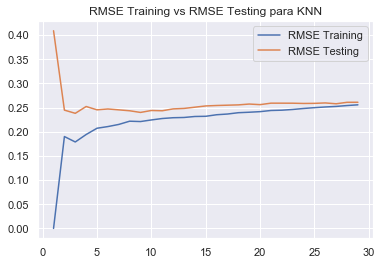

In [17]:
plt.plot(range(1,30, 1), rmses_dev, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_ho, label='RMSE Testing')
# plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

### **Cross validation**

**Calcular el RMSE promedio del resultado de cross validation para KNN. 
Como parámetros deberás usar:**
- 10 folds
- n_neighbors 5
- shuffle=True
- scoring neg_mean_squared_error.

El KNN guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usa la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`.

In [18]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [19]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  cross_val_score

In [20]:
# Seteamos los folds en los que queremos entrenar y testear.
# Se te ocurre algún caso donde shuffle debe ser False? (si no se te ocurre, dejá para el final esta pregunta)
kf = KFold(n_splits=10,shuffle=True) 

In [29]:
# una forma usabdi kflos
X = pd.DataFrame(X_dev)
y = pd.DataFrame(y_dev)

regressor= KNeighborsRegressor(n_neighbors=5)
# Calculá en esta celda los cross_val_score
prom=[]
import numpy as np


for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    regressor.fit(X_train,y_train)
    y_pred= knn.predict(X_test)
    tree_mse_test = mean_squared_error(y_test, y_pred)
    rmse= np.sqrt(tree_mse_test)
    prom.append(rmse)

print(np.mean(prom))

0.25344390008557094


In [32]:
#Alternativa
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, X_train, y_train,
                           scoring= "neg_mean_squared_error", cv=10)
rmse_scores = nmsq2rmse(scores).mean()
print(rmse_scores)

0.2599707301604256


Cálcular el valor promedio de RMSE

In [ ]:
promedio=pd.DataFrame(prom)
print("El promedio es: " + str(promedio[0].mean()))

Para ver el resultado final, reentrenamos al regresor y gráfiquemos la comparación entre los valores reales y los predichos 

In [ ]:
regressor.fit(X_dev, y_dev)
y_pred = regressor.predict(X_ho)
val_real = y_ho
val_pred = y_pred

Vamos a evaluar la relación 1:1 entre el valor estimado y real

Ahora vamos a gráficar la relación entre el valor estimado y real, y una recta 1:1.

In [ ]:
plt.scatter(val_real,val_pred)
plt.plot(val_real, val_real, 'r')
plt.xlabel('y_test', fontsize = 15)  
plt.ylabel('y_pred_multiple', fontsize = 15)  
plt.show()

Cálcular el coeficiente de determinación para el valor estimado y real

In [ ]:
from sklearn.metrics import r2_score
r_squared = r2_score(val_real,val_pred)
r_squared

Estimar los coeficiente de la recta de regresión entre el valor estimado y real

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
modelo = LinearRegression()
modelo.fit(val_real.reshape(-1,1),val_pred.reshape(-1,1))

y_predict = modelo.predict(val_pred.reshape(-1,1))
print(modelo.coef_,modelo.intercept_ )

¿Qué conclusiones puede sacar de este ejercicio? 